In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [3]:
from keras import optimizers
from keras import losses

In [4]:
data = pd.read_csv(r'C:\Users\singhegm\Downloads\house_data.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# drop some unnecessary columns
data = data.drop('date',axis=1)
data = data.drop('id',axis=1)
data = data.drop('zipcode',axis=1)

In [6]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [7]:
# having 19 neuron is based on the number of available features
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [8]:
X = data.drop('price',axis =1).values
y = data['price'].values

In [9]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [10]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [11]:
model.fit(x = X_train, y = y_train,
          batch_size=128, epochs=400,
         validation_data = (X_test,y_test))

Epoch 1/400
114/114 [==============================] - 4s 22ms/step - loss: 431747011023.0261 - val_loss: 428793036800.0000
Epoch 2/400
114/114 [==============================] - 0s 4ms/step - loss: 416483928794.1565 - val_loss: 422969376768.0000
Epoch 3/400
114/114 [==============================] - 0s 3ms/step - loss: 406722825705.7391 - val_loss: 364745064448.0000
Epoch 4/400
114/114 [==============================] - 0s 4ms/step - loss: 326917449603.3391 - val_loss: 188857958400.0000
Epoch 5/400
114/114 [==============================] - 0s 3ms/step - loss: 151210019189.9826 - val_loss: 87104536576.0000
Epoch 6/400
114/114 [==============================] - 0s 2ms/step - loss: 85912263777.9478 - val_loss: 71588052992.0000
Epoch 7/400
114/114 [==============================] - 0s 3ms/step - loss: 73583595947.4087 - val_loss: 64678727680.0000
Epoch 8/400
114/114 [==============================] - 0s 4ms/step - loss: 68167229546.8522 - val_loss: 60437233664.0000
Epoch 9/400
114/114 [=

Epoch 135/400
114/114 [==============================] - 0s 3ms/step - loss: 30140282149.8435 - val_loss: 29360773120.0000
Epoch 136/400
114/114 [==============================] - 0s 3ms/step - loss: 30580595168.8348 - val_loss: 29424590848.0000
Epoch 137/400
114/114 [==============================] - 0s 3ms/step - loss: 30559949886.3304 - val_loss: 29355993088.0000
Epoch 138/400
114/114 [==============================] - 0s 3ms/step - loss: 29772256425.1826 - val_loss: 29297883136.0000
Epoch 139/400
114/114 [==============================] - 0s 3ms/step - loss: 33093333330.3652 - val_loss: 29236400128.0000
Epoch 140/400
114/114 [==============================] - 0s 3ms/step - loss: 29255109320.3478 - val_loss: 29317617664.0000
Epoch 141/400
114/114 [==============================] - 0s 3ms/step - loss: 32530658669.0783 - val_loss: 29189959680.0000
Epoch 142/400
114/114 [==============================] - 0s 3ms/step - loss: 29463322534.9565 - val_loss: 29161437184.0000
Epoch 143/400
11

114/114 [==============================] - 0s 4ms/step - loss: 27042796481.6696 - val_loss: 26663927808.0000
Epoch 268/400
114/114 [==============================] - 0s 3ms/step - loss: 27662016173.6348 - val_loss: 26689892352.0000
Epoch 269/400
114/114 [==============================] - 0s 4ms/step - loss: 27553289278.3304 - val_loss: 26742206464.0000
Epoch 270/400
114/114 [==============================] - 0s 3ms/step - loss: 28814318494.0522 - val_loss: 26598608896.0000
Epoch 271/400
114/114 [==============================] - 0s 3ms/step - loss: 26033136168.0696 - val_loss: 26686164992.0000
Epoch 272/400
114/114 [==============================] - 0s 4ms/step - loss: 27710354262.8174 - val_loss: 26623578112.0000
Epoch 273/400
114/114 [==============================] - 0s 3ms/step - loss: 26500445647.0261 - val_loss: 26586308608.0000
Epoch 274/400
114/114 [==============================] - 0s 3ms/step - loss: 26987817031.2348 - val_loss: 26586279936.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 22818210076.9391 - val_loss: 22904872960.0000
Epoch 400/400
114/114 [==============================] - 0s 3ms/step - loss: 22512059436.5217 - val_loss: 22816235520.0000


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,502
Trainable params: 1,502
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

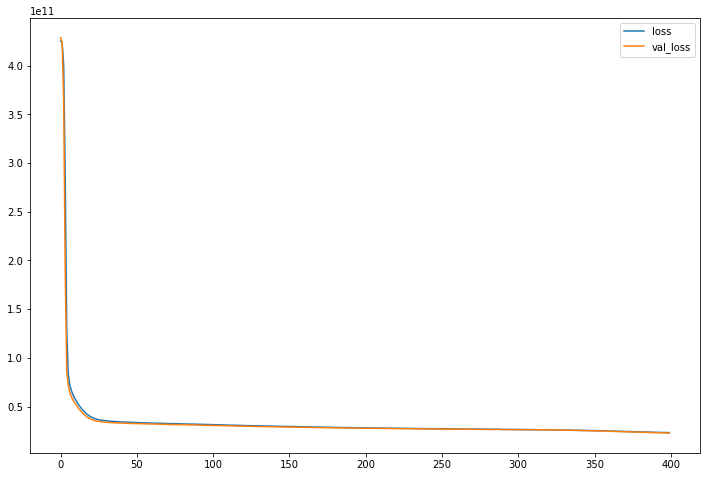

In [13]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))
plt.show()

In [14]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 90129.70741185336
MSE: 22816235516.58797
RMSE: 151050.44030583947
VarScore: 0.8336561855220559


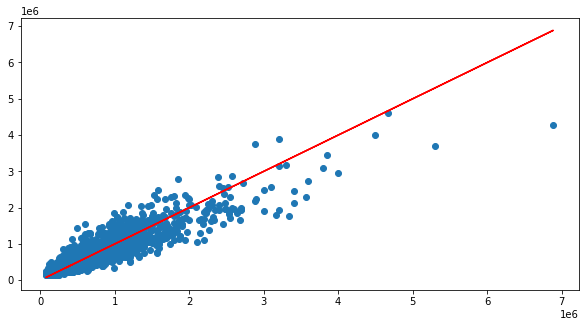

In [15]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.show()